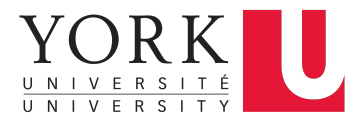

This Code Includes the Work Done as The EECS6322: Neural Networks and Deep Learning Course Project.

The work Include the Process Made To Regenrate the Work Done in The Paper Under the Title:

**On the Resiliency of Power and Gas Integration
Resources Against Cyber Attacks** 

By: Ahmed Abdelaziz (219867753) and Mohammadreza Kazemi (215888985)


Supervised by:
Prof. Konstantinos Derpanis



---
**Abstract**: This proposal discusses the key contribution of the paper titled "On the Resiliency of Power and Gas Integration Resources Against Cyber Attacks " The relationship of the paper with the EECS6322 course is also emphasized. The paper proposes a cybersecurity framework that uses machine learning, particularly neural networks, to defend against cyberattacks. Both the information received from field sensors and the information shared between power utilities and control panels are protected. Convolutional neural networks and wavelet transforms were used to safeguard primary field measurements, while an unsupervised classification neural network was used to detect the exact operation point of the control signals shared from the power utility. The output of the unsupervised neural network was then utilized by a second neural network to determine the exact operation point and detect any potential cyberattacks in the power utility’s information.




---
**Introduction**

 * **EnergyHubs**

 In recent years, Renewable Energy Sources (RESs) have emerged as a promising alternative to traditional fossil fuels, aiming to promote clean energy generation and reduce greenhouse gas emissions and global warming. However, the power generated from RESs is subject to fluctuations due to changes in weather conditions. For example, wind turbine power production depends on wind speed, which can vary greatly. To maintain a stable power system, it is necessary to dampen the fluctuations in RES power generation to match demand. To achieve this, the power and natural gas systems are interconnected to form an energy hub. This is accomplished through the use of Power-to-Gas (PtG) units, which convert electric power into hydrogen gas, and Gas-fired-Generation (GfG) units, which convert gas into electric power. By converting the fluctuating electric power generated by RESs into stored gas, the energy hub ensures stable operation, with GfG units providing smooth, controllable electric power to meet demand. Figure (1) shows the integrated power and gas systems energy hub structure.


 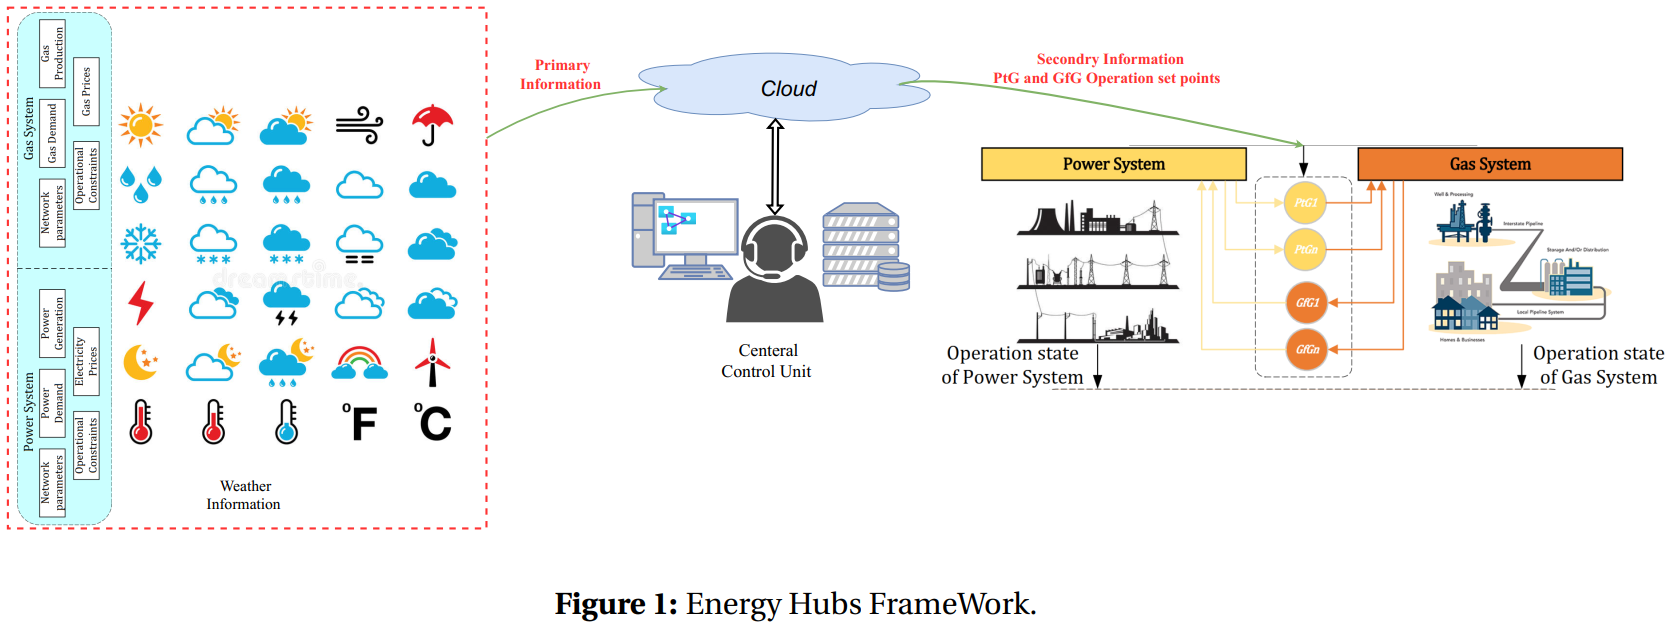









---

* **Operation Strategy**

The operation set points of PtG and GfG are determined by energy hub operators, and power and gas system operators, in the private sector with the goal of maximizing profits. The strategy is to convert electric power
to gas to meet gas grid demand when there is a low demand for electric power and high demand for gas, increasing gas grid profits, and vice versa when there is high demand for electric power. Energy hub operators collect primary information such as weather conditions, power and gas demand, market prices, and
operational levels and limitations from energy hub sensors and transmit this information to a central control unit over the cloud. The central control unit then calculates the optimal operation set points for the PtG and GfG units, known as secondary information, which are then sent back to units over the cloud.


---
* **Cyber_Security Of Energy Hubs**

Cyberattacks that take the form of False Data Injection (FDI) are said to be one of the most pressing problems that cause energy hub operations to deviate from optimal performance. Attackers carry out FDI cyberattacks
by tampering with cloud information, with the intention of deceiving energy hub operators and decreasing system profitability. They can either target the primary information from field sensors when it is shared to the cloud or attack the secondary information when it is transmitted from the central control unit to the PtG or GfG units. To address this issue, this paper employs artificial intelligence neural networks to design two FDI detection layers, aimed at safeguarding the primary information from field sensors and preventing any
tampering with PtG and GfG operation settings. The two layers will be described in detail in the subsequent sections.




---
**Cybersecurity Layers**

The paper proposes two cyber security layers to safeguard the energy hubs against cyberattacks. The first layer uses a convolutional neural network for classification, and my partner Mohammadreza Kazemi will develop and evaluate it. Figure (2) shows the structure of the Primary Information Cybersecurity Layer. In this code, my focus is on the second cyber security layer, which aims to protect against attacks on the ptg and gfg information.
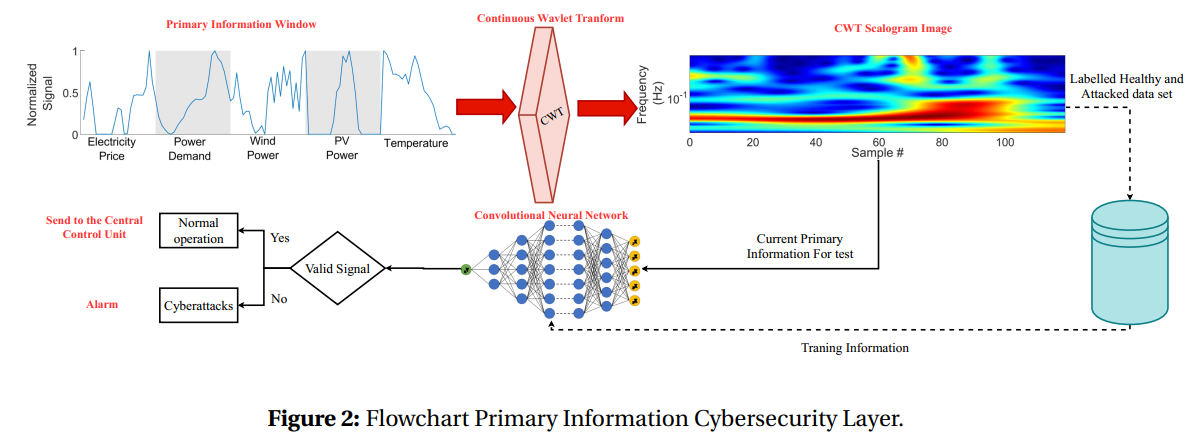

---

**Secondary Information CyberSecurity Layer**


A neural network framework consisting of two fully connected neural networks is utilized to detect cyberattacks in the secondary information. The design of this FDI detection layer is shown in Figure (3). The first fully connected neural network is used for classification purposes and receives the five elements of the primary information to output the expected operating region of each PtG and GfG unit, which is divided into three classes: out of loading (None), full loading (Maximum), and in-between. This network is trained using
healthy information. The output of the first fully connected layer is combined with the primary information to form six elements, which are used as inputs to the second fully connected neural network. This network serves as a regression network and uses the primary information and output of the classification network to estimate the exact operating point of each PtG and GfG. This network is also trained using only healthy data. As both layers do not require any labeled data, healthy or attacked, the secondary information cybersecurity layer is considered an unsupervised framework. If the estimated operating point from the regression network deviates significantly from the information received from the central units over the cloud (∆P > thr eshold), a cybersecurity alarm will be triggered.
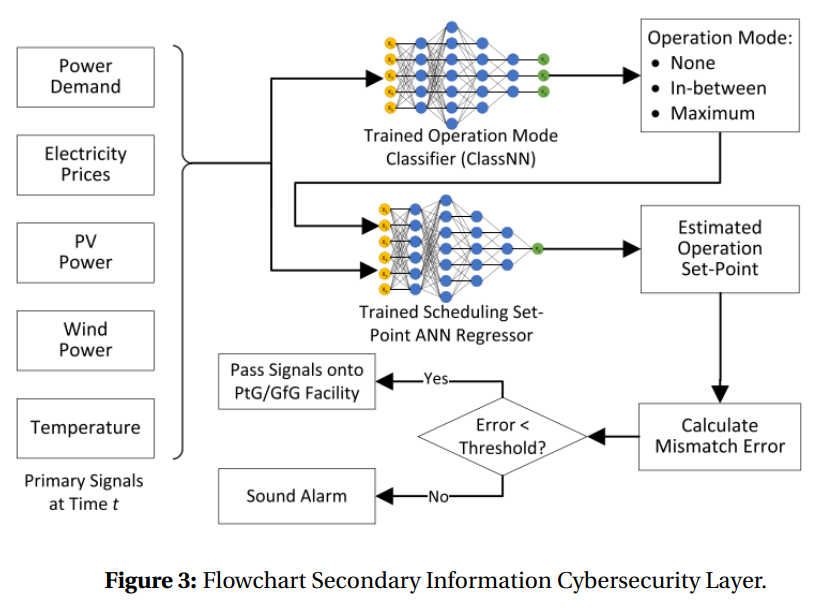



---


**This Part Includes the Code of the Secondry Information Cybersecurity Layer**

First Step is to setup the folder with all needed information.

In [ ]:
## upload folder
from google.colab import drive
drive.mount('/content/gdrive')
# change the directory to the manted files
import os
os.chdir("/content/gdrive/MyDrive/project")
!ls # print the current location to check that every thing works good 

The following Folders are defined:


*   main: main code of tranning and validation
*   utils.py: Class, function needed in the code 



In [2]:
# Improt the needed folder 
import utils
import torch
import torchvision
from torchvision import datasets, transforms
import numpy as np
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn.functional as F
from torch.utils.data import WeightedRandomSampler
import pandas as pd

ModuleNotFoundError: ignored

This section includes the tranning steps for the first classification network:
The network is a classification network with 3 output class and recives 5 inputs.



---

Upload the Data_set, and split the data set for training and validation.

In [ ]:
# data set uploader
unfiromdata=True
if unfiromdata==True:
  dataset=utils.MyDataset1('ptg1.xlsx')
else:
  dataset=utils.MyDataset('ptg1.xlsx')
# Now split the data set to train and validation 
training_ratio=0.7 # ratio of the training data set ratio 
train_size = int(training_ratio * len(dataset)) # get the tain size 
val_size = len(dataset) - train_size # get the validation size

# Split the dataset into training and validation sets
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
batch_size=300 # define the batch_size

# Create data loaders for the training and validation sets
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,num_workers=4)

Choose the Neural Network type and class the network

In [ ]:
# define the network type
Net_type='Forward' # define the type of the network used
weigted_class_loss=False; #define different weight for each class
if Net_type=='Forward':
   net = utils.Net()
elif Net_type=='Residual':
   net=utils.ResidualNet()
else:
  print('Network Type was not given, Forward network is used by defult')
  net = utils.Net()

# define the loss rype and the optimizer
if weigted_class_loss==True:
   class_weights = torch.tensor([(1-0.8063), (1-0.0784), (1-0.1153)])
   loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)
else:
  loss_fn = torch.nn.CrossEntropyLoss()
# define the optimizer as Adam 
optimizer = torch.optim.Adam(net.parameters(), lr=0.005, weight_decay=0.001)

Now Staring the Traing loop:

In [ ]:
# this is the main traning loop part:
save_model=False # parameter to save the model
Regulization_parameters=True # add penalty for high weights values
Normilze_features=False
lambda_l2 = 0.01 # add regulization parameter

global_it = 0 # defined here, use in your summaries
writer=SummaryWriter() # setup the writer directory

# ==================================================================
# Train loop
# ==================================================================
for epoch in range(100):
    for x, y in train_dataloader:
        if Normilze_features==True:
          # normlize the input data set 
          mean = torch.mean(x, dim=0)
          std = torch.std(x, dim=0)
          x = (x - mean) / std
        
        optimizer.zero_grad() ## This is was not added at to make the gradiant zero again, after adding it the accurcy was imrproved

        pred = net(x)
        y_onehot = F.one_hot(y, num_classes=3).float() # convert to one-hot vector
        if Regulization_parameters==True:
          loss = loss_fn(pred,y_onehot) + lambda_l2 * sum((param**2).sum() for param in net.parameters())
        else:
          loss = loss_fn(pred,y_onehot)

        accuracy = utils.compute_accuracy(pred.cpu().detach().numpy(),y.cpu().detach().numpy())
        loss.backward()
        optimizer.step()

        # print out stats every 10 its
        if global_it % 10 == 0:
            print(f'Iteration: {global_it} | Loss: {loss.item()} | Accuracy: {accuracy}')
        ## store the loss and accuracy values
        writer.add_scalar("Loss/train", loss,global_it) # add a value of the loss for the writer
        writer.add_scalar("Accuracy/train", accuracy,global_it) # add a value of the loss for the writer
        # increment
        global_it += 1

writer.flush()
print('Training complete')
writer.close()
# Save the model's state dictionary to a file
if save_model==True:
   torch.save(net.state_dict(), 'net_classification.pth')

Start The validation of the Classification Network:

In [ ]:
# now create the validation loop of the model
# Validation loop
with torch.no_grad(): # Turn off gradient calculation to speed up computation and reduce memory usage
    net.eval() # Set network to evaluation mode
    total_loss = 0
    total_accuracy = 0
    total_examples = 0
    for x_val, y_val in val_dataloader:
        if Normilze_features==True:
           mean = torch.mean(x, dim=0)
           std = torch.std(x, dim=0)
           x = (x - mean) / std

        pred_val = net(x_val)
        #print(pred_val)
        
        y_val_onehot = F.one_hot(y_val, num_classes=3).float() # convert to one-hot vector
        
        loss_val = loss_fn(pred_val, y_val_onehot)
        accuracy_val = utils.compute_accuracy(pred_val.cpu().detach().numpy(),y_val.cpu().detach().numpy())
        total_loss += loss_val.item() * x_val.size(0) # Multiply the loss by the batch size to account for varying batch sizes
        total_accuracy += accuracy_val * x_val.size(0)
        total_examples += x_val.size(0)

    avg_loss = total_loss / total_examples
    avg_accuracy = total_accuracy / total_examples
    print(f'Validation | Loss: {avg_loss} | Accuracy: {avg_accuracy}')
torch.save(net.state_dict(), 'net_classification.pth')

Validation | Loss: 0.6786576274882627 | Accuracy: 0.904672015101463


After traning the network, now we get the predection of the network. 

Also create the new dataset  for the regression network traning

In [ ]:
Load_pre_model=True
if Load_pre_model==True:
    net = utils.Net()
    # Load the state dict from the saved file
    state_dict = torch.load('net_classification.pth')
    # Load the state dict into the network
    net.load_state_dict(state_dict)
# check the model perfromance over the new data_set
dataset2=utils.MyDataset('ptg1.xlsx')
dataloader = DataLoader(dataset2, batch_size=len(dataset), shuffle=False)

for x, y in dataloader:
    output=net(x)
out_class=torch.argmax(output,dim=1)

In [ ]:
# store the data into new excel file to be ready for the regression data set
import pandas as pd
df = pd.read_excel('regression_train_data.xlsx')
# Add outclass tensor as a new column
df['Output'] = out_class.numpy()
# Save the modified DataFrame to the same Excel file
df.to_excel('regression_train_data.xlsx', index=False)



---


# **Regression Neural Network**

In this part the Second Neural Network is developed to estimate the exact value of the PtG/GfG operation.



---
Upload the traning data_set for the regression task


In [1]:
# this to update the utils due to the current change made by me. 
from importlib import reload  # Py3 only; unneeded in py2.
utils = reload(utils)

NameError: ignored

In [ ]:
# data set uploader
dataset=utils.MyDataset2('regression_train_data.xlsx')

# Now split the data set to train and validation 
training_ratio=0.7 # ratio of the training data set ratio 
train_size = int(training_ratio * len(dataset)) # get the tain size 
val_size = len(dataset) - train_size # get the validation size

# Split the dataset into training and validation sets
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
batch_size=300 # define the batch_size

# Create data loaders for the training and validation sets
train_dataloader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=True,num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,num_workers=4)

Call the neural network for the regression task:

In [ ]:
# call the network
# call the network

Net =utils.RegressionNet()
# define the loss MSE
# loss_fn=torch.nn.MSELoss()
# define the loss 
loss_fn=torch.nn.L1Loss() 
# define the optimizer as Adam 
optimizer = torch.optim.Adam(Net.parameters(), lr=0.1)

Now set up the traning loop

In [ ]:
# this is the main traning loop part:
save_model=False # parameter to save the model
Regulization_parameters=False # add penalty for high weights values
Normilze_features=False
lambda_l2 = 0.01 # add regulization parameter

global_it = 0 # defined here, use in your summaries
writer=SummaryWriter() # setup the writer directory

# ==================================================================
# Train loop
# ==================================================================
for epoch in range(10):
    Net.train()
    for x, y in train_dataloader:
        if Normilze_features==True:
          # normlize the input data set 
          mean = torch.mean(x, dim=0)
          std = torch.std(x, dim=0)
          x = (x - mean) / std
        optimizer.zero_grad()

        pred = Net(x)

        if Regulization_parameters==True:
          loss = loss_fn(pred,y.float()) + lambda_l2 * sum((param**2).sum() for param in Net.parameters())
        else:
          loss = loss_fn(pred,y.float())

        loss.backward()
        optimizer.step()

        # print out stats every 10 its
        if global_it % 10 == 0:
            print(f'Iteration: {global_it} | Loss: {loss.item()}')
        ## store the loss and accuracy values
        writer.add_scalar("Loss/train", loss,global_it) # add a value of the loss for the writer
        # increment
        global_it += 1

writer.flush()
print('Training complete')
writer.close()
# Save the model's state dictionary to a file
if save_model==True:
   torch.save(Net.state_dict(), 'Net_regression.pth')

Iteration: 0 | Loss: 12.285447120666504
Training complete


In [ ]:
print(Net.parameters)
for name, param in Net.named_parameters():
    if param.requires_grad:
        print(name, param.data)

Start the Validation of the Regression task

In [ ]:
# now create the validation loop of the model
# Validation loop
with torch.no_grad(): # Turn off gradient calculation to speed up computation and reduce memory usage
    Net.eval() # Set network to evaluation mode
    total_loss = 0
    total_examples = 0
    for x_val, y_val in val_dataloader:
        if Normilze_features==True:
           mean = torch.mean(x, dim=0)
           std = torch.std(x, dim=0)
           x = (x - mean) / std

        pred_val = Net(x_val)
              
        loss_val = loss_fn(pred_val, y_val)
        total_loss += loss_val.item() * x_val.size(0) # Multiply the loss by the batch size to account for varying batch sizes
        total_examples += x_val.size(0)

    avg_loss = total_loss / total_examples
    print(f'Validation | Loss: {avg_loss}')

Validation | Loss: 4.386910666069483


/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([228])) that is different to the input size (torch.Size([228, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Now compare with the whole training data set


In [ ]:
Load_pre_model=False
if Load_pre_model==True:
    Net = utils.Net()
    # Load the state dict from the saved file
    state_dict = torch.load('Net_regression.pth')
    # Load the state dict into the network
    Net.load_state_dict(state_dict)
# check the model perfromance over the new data_set
dataset_regression_check=utils.MyDataset('regression_train_data.xlsx')
dataloader = DataLoader(dataset_regression_check, batch_size=len(dataset), shuffle=False)
print(dataset_regression_check[0])
#print(Net.layers)
for x, y in dataloader:
    output=Net(x)
print(output)

In [ ]:
# analyze the model Performance:

output=torch.clamp(output, min=0.0, max=30.0)
output=output.squeeze()
diff=y-output.squeeze()
print(torch.sqrt(torch.mean(torch.pow(diff, 2))))
print(output.size())
print(y.size())
print(diff.size())
df = pd.DataFrame({
    'Target': y.numpy(),
    'Output': output.detach().numpy(),
    'Difference': diff.detach().numpy()
})

# save the dataframe to an Excel file
df.to_excel('regression_results.xlsx', index=False)

Try LBFGS optimizer 

In [ ]:
from torch.optim import LBFGS
# call the network
# call the network
class RegressionNet(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = torch.nn.Sequential(
      torch.nn.Linear(6, 100),
      torch.nn.ReLU(),
      torch.nn.Linear(100, 100),
      torch.nn.ReLU(),
      torch.nn.Linear(100, 1)
    )


  def forward(self, x):
    # Clamp output between 0 and 30
    return torch.clamp(self.layers(x), 0, 30)
#Net =utils.RegressionNet()
Net =RegressionNet()
# define the loss MSE
loss_fn=torch.nn.MSELoss()
# define the loss 
#loss_fn=torch.nn.L1Loss() 
# define the optimizer as Adam 
optimizer = LBFGS(Net.parameters(), lr=0.01)

#############
for epoch in range(10):
    for batch in train_dataloader:
        def closure():
            optimizer.zero_grad()
            x, y = batch
            y_pred = Net(x)
            loss = loss_fn(y_pred, y)
            loss.backward()
            print(loss)
            return loss
        optimizer.step(closure)
